In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib as mpl
import numpy.linalg as la
import matplotlib.style as style

mpl.rcParams['mathtext.fontset'] = 'stix'
mpl.rcParams['font.family'] = 'STIXGeneral'
# print(mpl.rcParams['font.size'])
mpl.rcParams['font.size'] = 13.5

# Conclave

In [2]:
data_sizes = ['1MB', '10MB', '100MB', '1GB']
query_numbers = [1,5,6]

data_query_dict = {}
for query_num in query_numbers:
    data_size_list = []

    for data_size in data_sizes:
        time_taken_col = f"{data_size}"
        cols = ["size", "timestamp", time_taken_col]
        path = f"demo/{data_size}_tpch_{query_num}_out.txt"
        try:
            data = pd.read_csv(path, names=cols, header=None)
            # data.set_axis(cols, axis=1)
            time_col = data.loc[:,time_taken_col]
            print(time_col, type(time_col))
            data_size_list.append(time_col)

        except:
            print(f"Failed to read file {path}")
    data_query_dict[query_num] = data_size_list

# returns a data_query_dict with key = query_number

0    16.447145
1    16.395264
2    16.483784
3    16.415551
4    16.313149
5    16.459447
6    16.374067
7    17.390643
8    16.458662
9    17.443606
Name: 1MB, dtype: float64 <class 'pandas.core.series.Series'>
0    17.026459
1    17.059420
2    16.980745
3    17.165689
4    16.967144
5    17.056472
6    16.974642
7    17.005001
8    16.981170
9    17.047704
Name: 10MB, dtype: float64 <class 'pandas.core.series.Series'>
0    22.852741
1    22.987756
2    22.945467
3    22.786315
4    22.884758
5    22.877629
6    23.108888
7    22.822217
8    22.826688
9    22.915663
Name: 100MB, dtype: float64 <class 'pandas.core.series.Series'>
0    83.551779
1    84.153512
2    83.370646
3    83.710964
4    84.398326
5    83.486126
6    83.458612
7    83.807827
8    83.797450
9    83.392813
Name: 1GB, dtype: float64 <class 'pandas.core.series.Series'>
0     237.724944
1     246.438931
2     237.659470
3     238.440992
4     237.256153
5     242.745124
6     237.214036
7     243.378507
8     231.918

# Data Station

In [3]:
data_sizes = ['1MB', '10MB', '100MB', '1GB']
query_numbers = [1,2,3]
party_number = 2


query_dict = {}

from collections import defaultdict
for qnum in query_numbers:
    query_dict[qnum] = defaultdict(list)

for data_size in data_sizes:
    time_taken_col = f"{data_size}"
    cols = ["query", time_taken_col]
    path = f"ds_data/conclave_queries/{data_size}_{party_number}.csv"
    print(query_dict)

    # try:
    data = pd.read_csv(path, names=cols, header=None)
    time_col = data.loc[:,time_taken_col]
    query_col = data.loc[:,"query"]
    # data.set_axis(cols, axis=1)
    for idx, query_num in enumerate(query_col):
        query_dict[query_num][data_size].append(time_col[idx])
    print(query_dict)

    # except:
    #     print(f"Failed to read file {path}")
data_station_dict = {}
for qnum in query_numbers:
    data_station_dict[qnum] = [pd.Series(value).rename(k) for k, value in query_dict[qnum].items()]

for i in range(len(data_sizes)):
    print(data_station_dict[2][i])

# Returns a data_station_dict with key = query number

{1: defaultdict(<class 'list'>, {}), 2: defaultdict(<class 'list'>, {}), 3: defaultdict(<class 'list'>, {})}
{1: defaultdict(<class 'list'>, {'1MB': [1.6774191856384275, 1.5875263214111328, 1.5726404190063477]}), 2: defaultdict(<class 'list'>, {'1MB': [1.5643503665924072, 1.5619549751281738, 1.595458984375]}), 3: defaultdict(<class 'list'>, {'1MB': [1.5407154560089111, 1.5356895923614502, 1.5477800369262695]})}
{1: defaultdict(<class 'list'>, {'1MB': [1.6774191856384275, 1.5875263214111328, 1.5726404190063477]}), 2: defaultdict(<class 'list'>, {'1MB': [1.5643503665924072, 1.5619549751281738, 1.595458984375]}), 3: defaultdict(<class 'list'>, {'1MB': [1.5407154560089111, 1.5356895923614502, 1.5477800369262695]})}
{1: defaultdict(<class 'list'>, {'1MB': [1.6774191856384275, 1.5875263214111328, 1.5726404190063477], '10MB': [1.801450490951538, 1.7279384136199951, 1.7361106872558594]}), 2: defaultdict(<class 'list'>, {'1MB': [1.5643503665924072, 1.5619549751281738, 1.595458984375], '10MB': [

# Plots

In [4]:
def raw_mmm(df):
    median = df.median()
    min = df.min()
    max = df.max()
    return min, median, max

[(16.31314878199919, 16.45290354699955, 17.443606448001447), (16.96714354299911, 17.01573018450017, 17.16568877700047), (22.786315392000688, 22.881193859499945, 23.108887696998863), (83.37064573899988, 83.6313716249997, 84.39832562999982)]
[(1.5726404190063477, 1.5875263214111328, 1.6774191856384275), (1.7279384136199951, 1.7361106872558594, 1.801450490951538), (2.979782819747925, 3.006009578704834, 4.115457773208618), (15.63155746459961, 15.712296962738035, 24.51296448707581)]


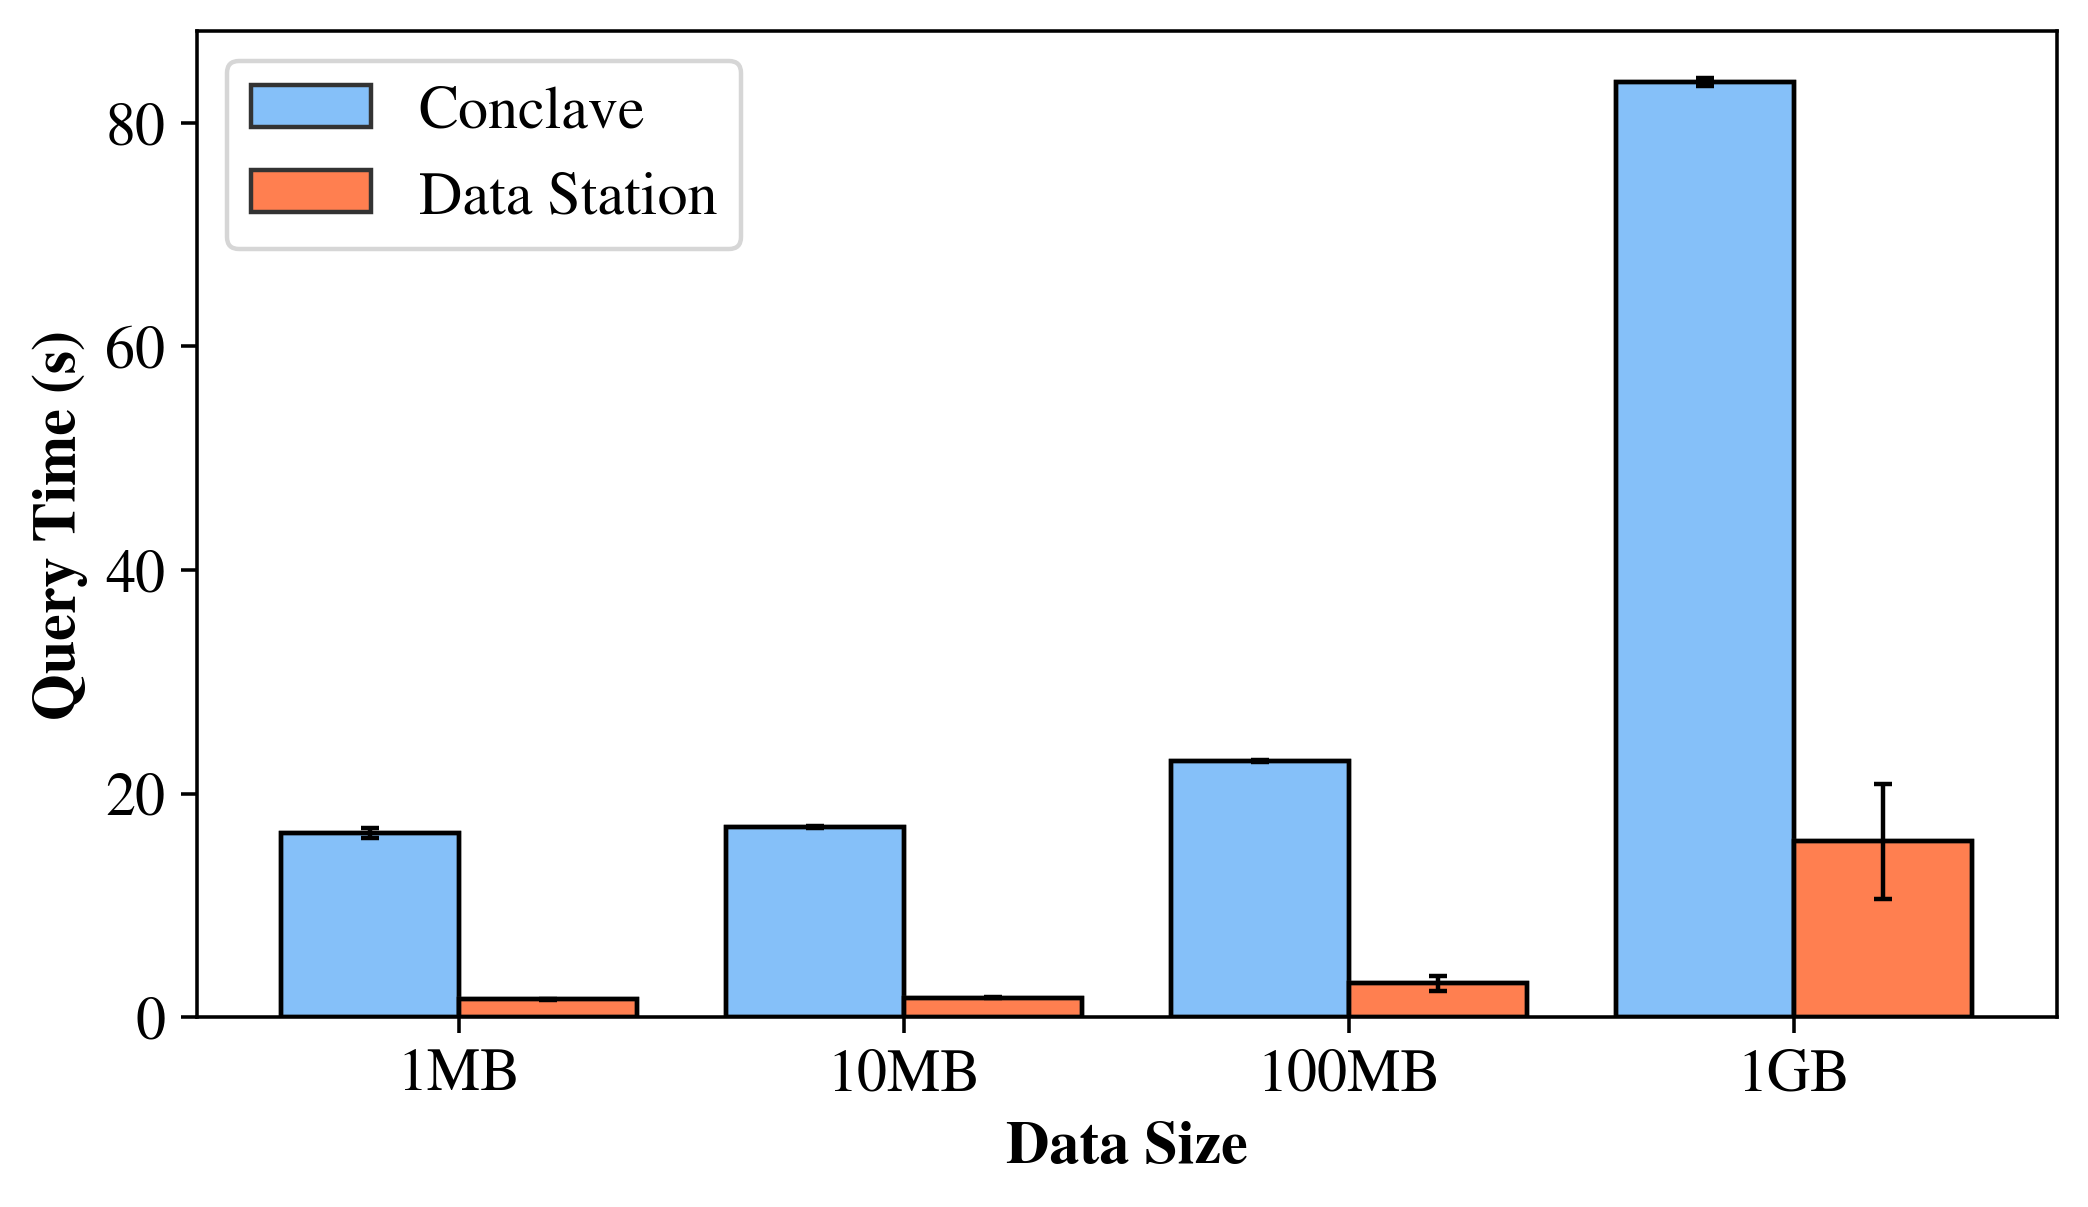

In [5]:
data_left = data_query_dict[1]
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict[1]
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(4)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Conclave",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
# plt.title("100GB Database Size")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("q1.pdf", bbox_inches='tight')

plt.show()


[(15.170532812000602, 15.814538162001554, 16.883553591003874), (54.165552061997005, 55.58190526950057, 59.20683350399486)]
[(1.5619549751281738, 1.5643503665924072, 1.595458984375), (1.7538552284240725, 1.7597203254699707, 1.7680294513702393), (2.995494842529297, 3.0281567573547363, 3.033928394317627), (15.79345417022705, 15.81292986869812, 15.88024091720581)]
[15.814538162001554, 55.58190526950057, nan, nan]


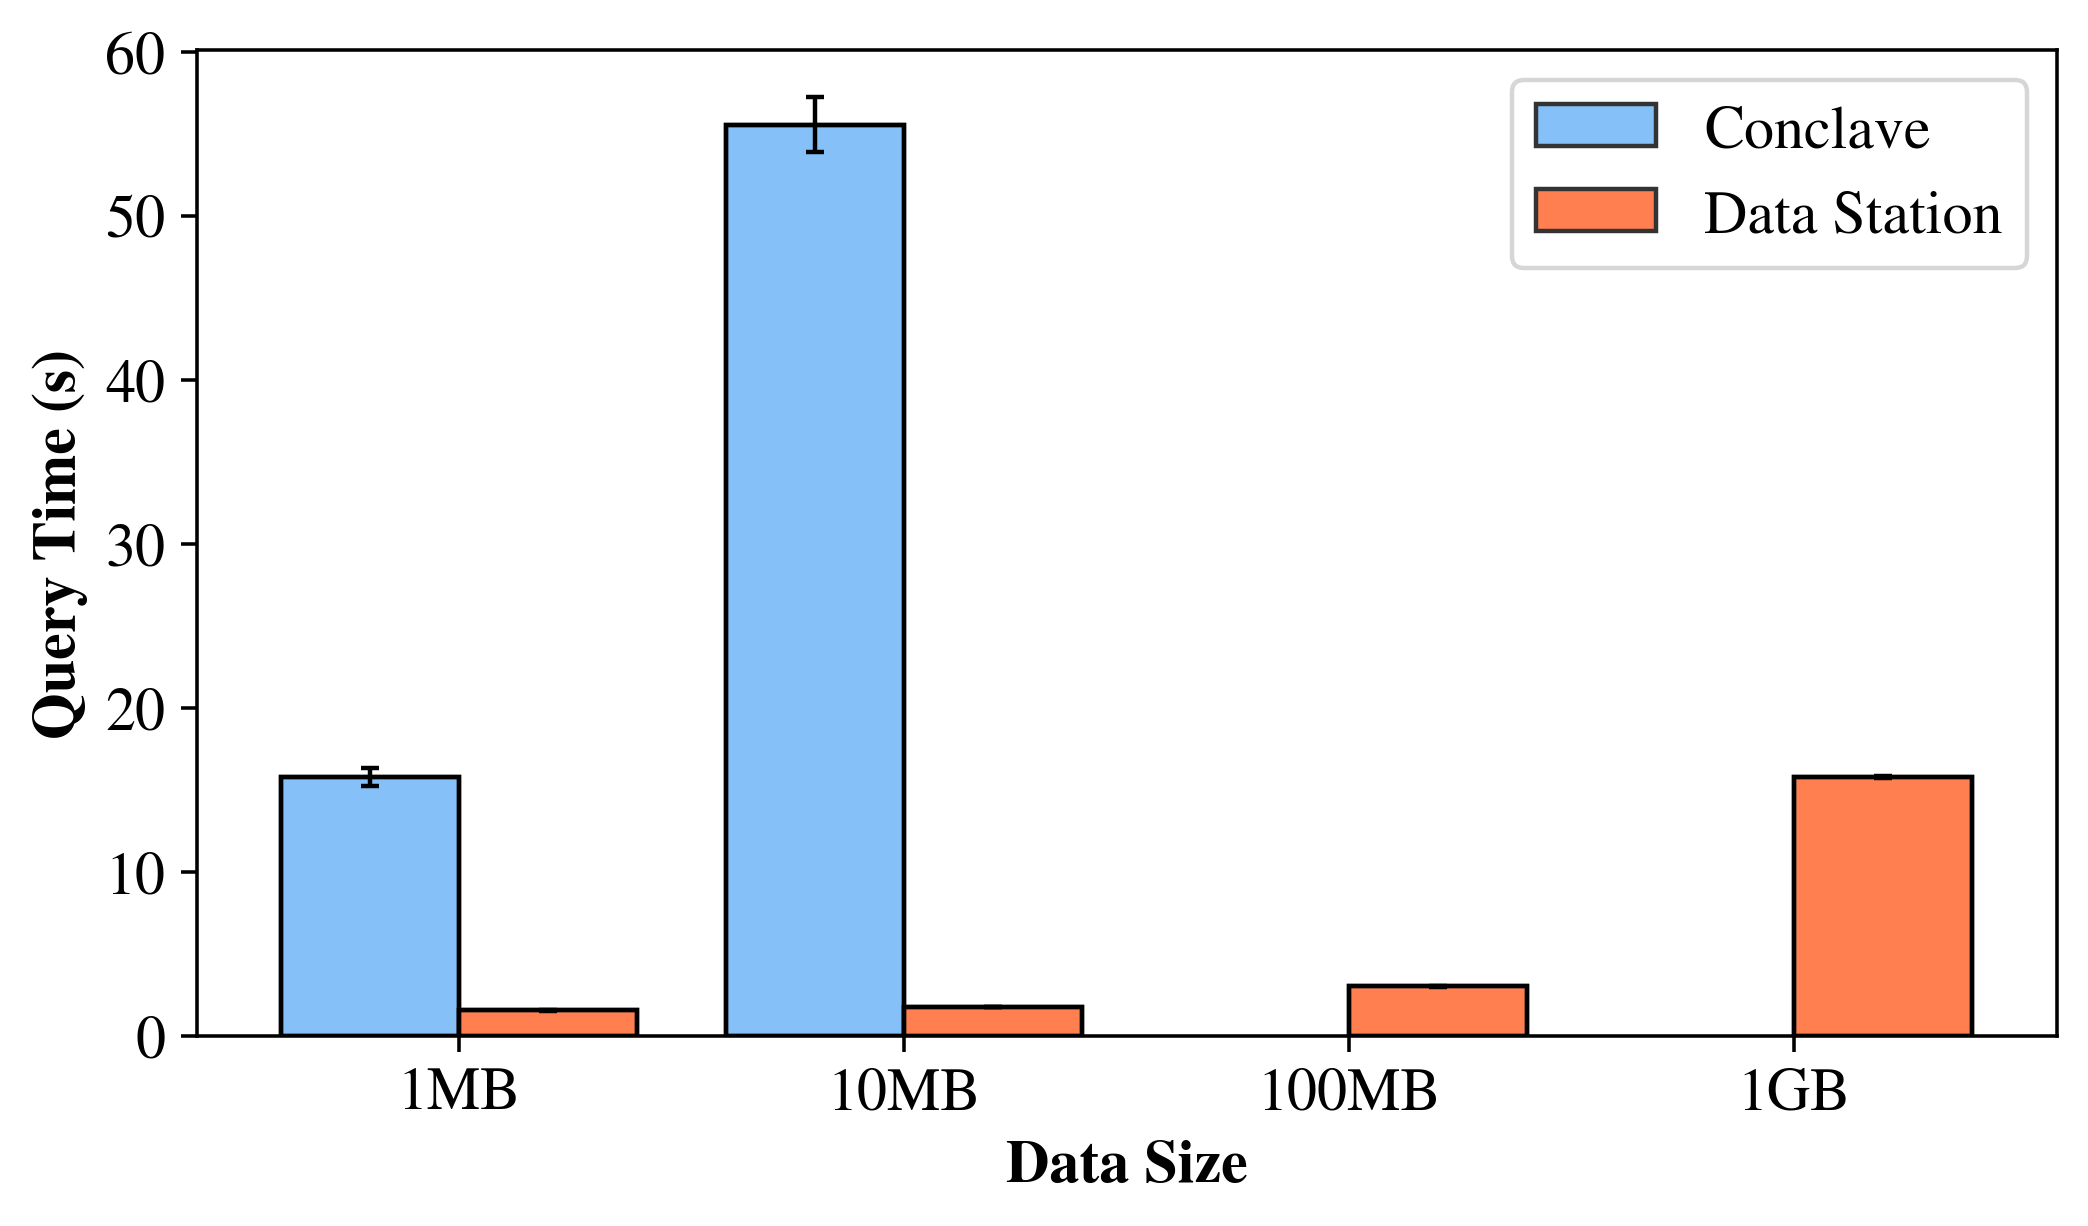

In [6]:
data_left = data_query_dict[6]
data_left_mmm = [raw_mmm(col) for col in data_left]
print(data_left_mmm)

data_right = data_station_dict[2]
data_right_mmm = [raw_mmm(col) for col in data_right]
print(data_right_mmm)

X_axis = np.arange(4)+1

width = 0.4

# min_no_sev, median_no_sev, max_no_sev = raw_mmm(no_sev)
# min_sev, median_sev, max_sev = raw_mmm(sev)

stdev_left = [col.std() for col in data_left] + ([float("nan")] * (len(data_right) - len(data_left)))
medians_left = [row[1] for row in data_left_mmm] + ([float("nan")] * (len(data_right) - len(data_left)))
print(medians_left)

stdev_right = [col.std() for col in data_right]
medians_right = [row[1] for row in data_right_mmm]

plt.figure(figsize=(7.5, 4), dpi=320)

plt.bar(x=X_axis-width/2,width=width,height=medians_left,label="Conclave",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='#85C0F9'
        )


plt.bar(x=X_axis-width/2,width=width,height=medians_left,yerr=stdev_left,
        # edgecolor=colors_right[i],
        # edgecolor=[.2,.2,.2],
        # alpha=0.8,
        # label=labels_left[i],
        # color='none',
        # color=colors_right[i],
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,label="Data Station",
#         # edgecolor=colors_right[i],
#         # edgecolor=[.2,.2,.2],
#         # alpha=0.8,
#         # label=labels_left[i],
#         # color='none',
#         # color=colors_right[i],
        edgecolor=[0.2,0.2,0.2],
#         # hatch="...",
        color='coral'
        )

plt.bar(x=X_axis+width/2,width=width,height=medians_right,yerr=stdev_right,
        edgecolor='black',
        error_kw={"elinewidth":1,"capsize":2,"capthick":1},
        color='none'
        )

plt.xlabel("Data Size", fontweight="bold")
plt.ylabel("Query Time (s)", fontweight="bold")
# plt.title("100GB Database Size")
plt.legend()

plt.xticks(X_axis, [col.name for col in data_right])

plt.savefig("q2.pdf", bbox_inches='tight')

plt.show()
